In [13]:
import cv2
from cv2 import imread
from cv2 import waitKey

img = imread("img/wai.png")
img_src = cv2.cvtColor(cv2.resize(img, (480,720)), cv2.COLOR_BGR2RGB)
img_flip_src = cv2.flip(img_src,1)


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import math
from  cv2 import KeyPoint

def get_dist(x, y, i, j):
    return math.sqrt(math.pow(x-i,2)+math.pow(y-j,2))
def get_simi(f1, f2):
    return torch.cosine_similarity(torch.from_numpy(f1),torch.from_numpy(f2), dim=0)
    # norm, id = torch.max(f1)
    # return 1
# 将特征点对称
# 创建sift计算子
feature_point_size = 500
sift = cv2.SIFT_create(feature_point_size)

img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
img_flip_gray = cv2.cvtColor(img_flip_src, cv2.COLOR_BGR2GRAY)
# 获取该图像的特征点
sift_src=sift.detectAndCompute(img_gray,None)
sift_flip=sift.detectAndCompute(img_flip_gray,None)

avg_sc = 0.0
theta = 50.0
pos_cnt = 0
for src_id, src_p in enumerate(sift_src[0]):
    x,y= src_p.pt[0], src_p.pt[1]
    dist = []
    simi = []
    for flip_id, flip_p in enumerate(sift_flip[0]):
        i,j = flip_p.pt[0], flip_p.pt[1]
        dis = get_dist(x,y,i,j)
        if dis <= theta:
            dist.append(dis)
            simi.append(get_simi(sift_src[1][src_id],sift_flip[1][flip_id]))
    if len(dist) != 0:
        pos_cnt += 1 
        dist = torch.log_softmax(torch.Tensor(dist),dim=0)
        # simi = torch.log(torch.Tensor(simi))
        # simi = 0.0
        # score_all = simi-dist
        # sc = max(score_all)
        sc = 0-min(dist)
        avg_sc += sc/ float(feature_point_size)
print(pos_cnt)
# 画出特征点
img=cv2.drawKeypoints(img_src, sift_src[0], img, color=(255, 0, 0))
plt.subplot(1,2,1)
plt.imshow(img_src)
plt.title(str(avg_sc))
plt.subplot(1,2,2)
plt.imshow(img)
print(avg_sc)

0.003975902399151566


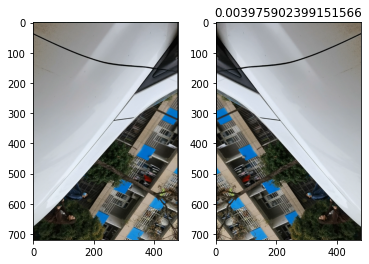

In [15]:
# 使用ssim
# maomao 0.33886752075566656
# 03  0.07650366363393567
from skimage.metrics import structural_similarity
from matplotlib import pyplot as plt
img_flip_gray = cv2.cvtColor(img_flip_src, cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)
sc = structural_similarity(img_flip_gray, img_gray, win_size=101)
plt.subplot(1,2,1)
plt.imshow(img_src)
plt.subplot(1,2,2)
plt.imshow(img_flip_src)
plt.title(str(sc))
print(sc)